# Pandas 4: Time Series.
    Bailey Smith
    November 9 2017

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

# Matplotlib customizations.
# plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016.
Read the data into a `Series` with a `DatetimeIndex` as the index.
Dropped rows with missing values, cast the `"VALUES"` column to floats, then plotted the data.

In [2]:
#Expect dip: market crash

In [36]:
djia = pd.read_csv("DJIA.csv", index_col="DATE")

In [37]:
djia = djia[djia["VALUE"] != "."] # getting rid of null values : "." 

In [38]:
djia["VALUE"] = djia["VALUE"].astype(float)
djia.index = pd.to_datetime(djia.index)

In [7]:
djia.head()

,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34


In [26]:
djia["VALUE"].mean()

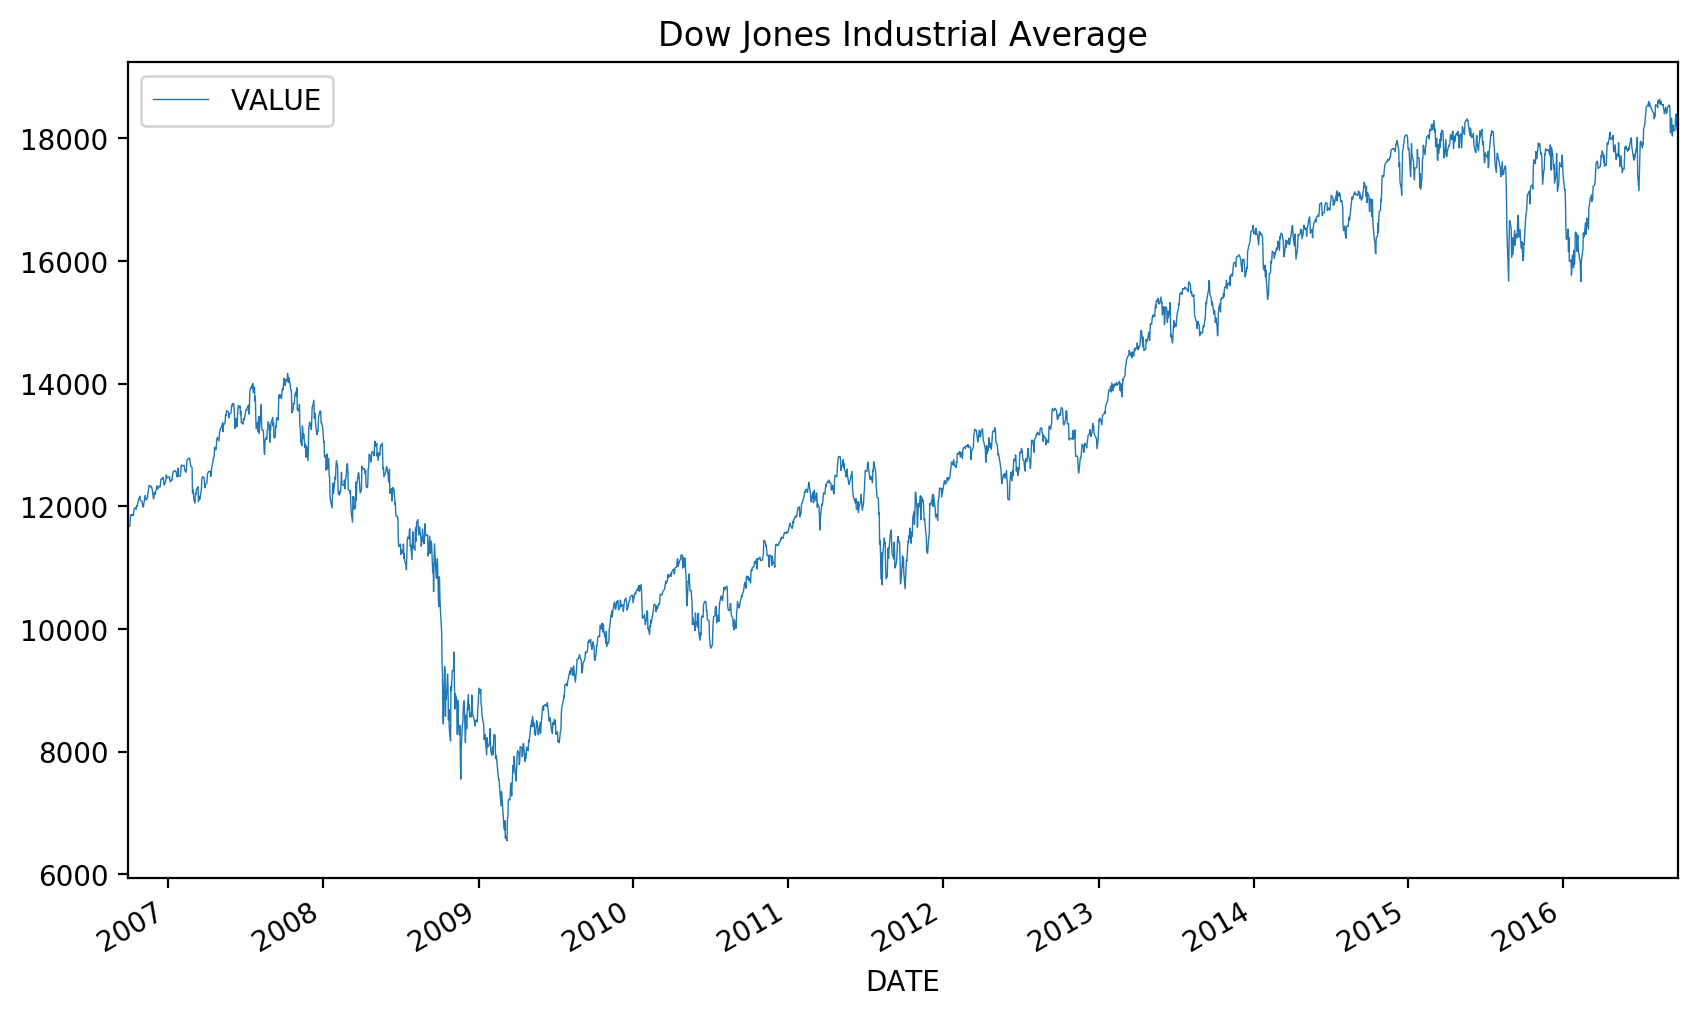

In [8]:
ax = plt.subplot(111)
djia.plot(lw=.5,ax=ax)
ax.set_title("Dow Jones Industrial Average")

The file `paychecks.csv` contains values of an hourly employee's last 93 paychecks.
He started working March 13, 2008.
This company hands out paychecks on the first and third Fridays of the month.
Read in the data, using `pd.date_range()` to generate the DatetimeIndex.
Plotted the data.

In [51]:
paychecks = pd.read_csv("paychecks.csv", header=None)
paychecks.head()

,0
0,1122.26
1,921.03
2,962.46
3,1035.97
4,1078.59


In [52]:
third = pd.date_range(start='3/13/2008',freq = "WOM-3FRI", periods=47)
first = pd.date_range(start='3/13/2008',freq = "WOM-1FRI", periods=46)
both = first.union(third)
paychecks.index = both
paychecks.columns = ["Payments"]
paychecks.head()

,Payments
2008-03-21,1122.26
2008-04-04,921.03
2008-04-18,962.46
2008-05-02,1035.97
2008-05-16,1078.59


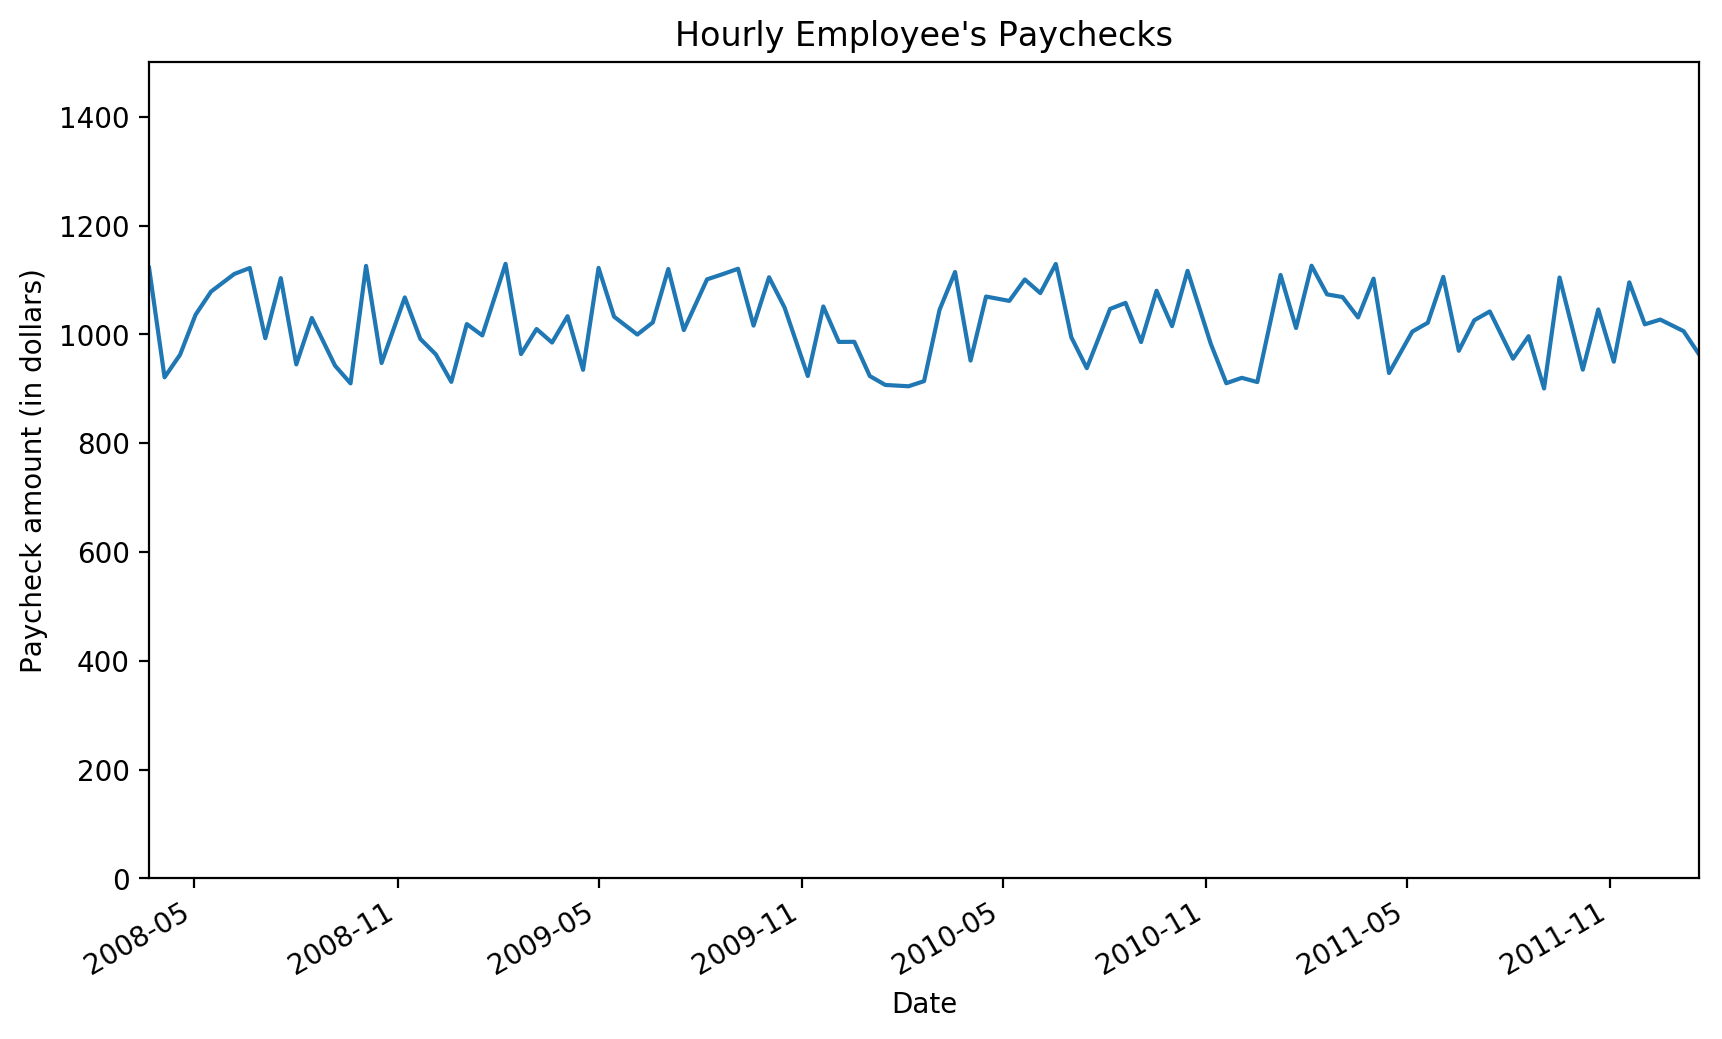

In [56]:
paychecks.plot(legend = None)
plt.xlabel("Date")
plt.ylabel("Paycheck amount (in dollars)")
plt.ylim(0,1500)
plt.title("Hourly Employee's Paychecks")

The file `finances.csv` contains a list of simulated quarterly earnings and expense totals from a fictional company.
Loaded the data into a `DataFrame` with a `PeriodIndex` with a quarterly frequency.
Assumed the fiscal year starts at the beginning of September and that the data begins in September 1978.
Plotted the data.

In [15]:
finances = pd.read_csv("finances.csv")
finances.head()

,EARNINGS,EXPENSES
0,372572.16,122611.27
1,419440.58,133176.18
2,419766.49,154670.69
3,361453.31,209360.42
4,354463.33,174147.13


In [16]:
len(finances["EARNINGS"])

84

In [17]:
finances.index = pd.period_range(start="1978-09", end="1999-08", freq="Q-AUG")

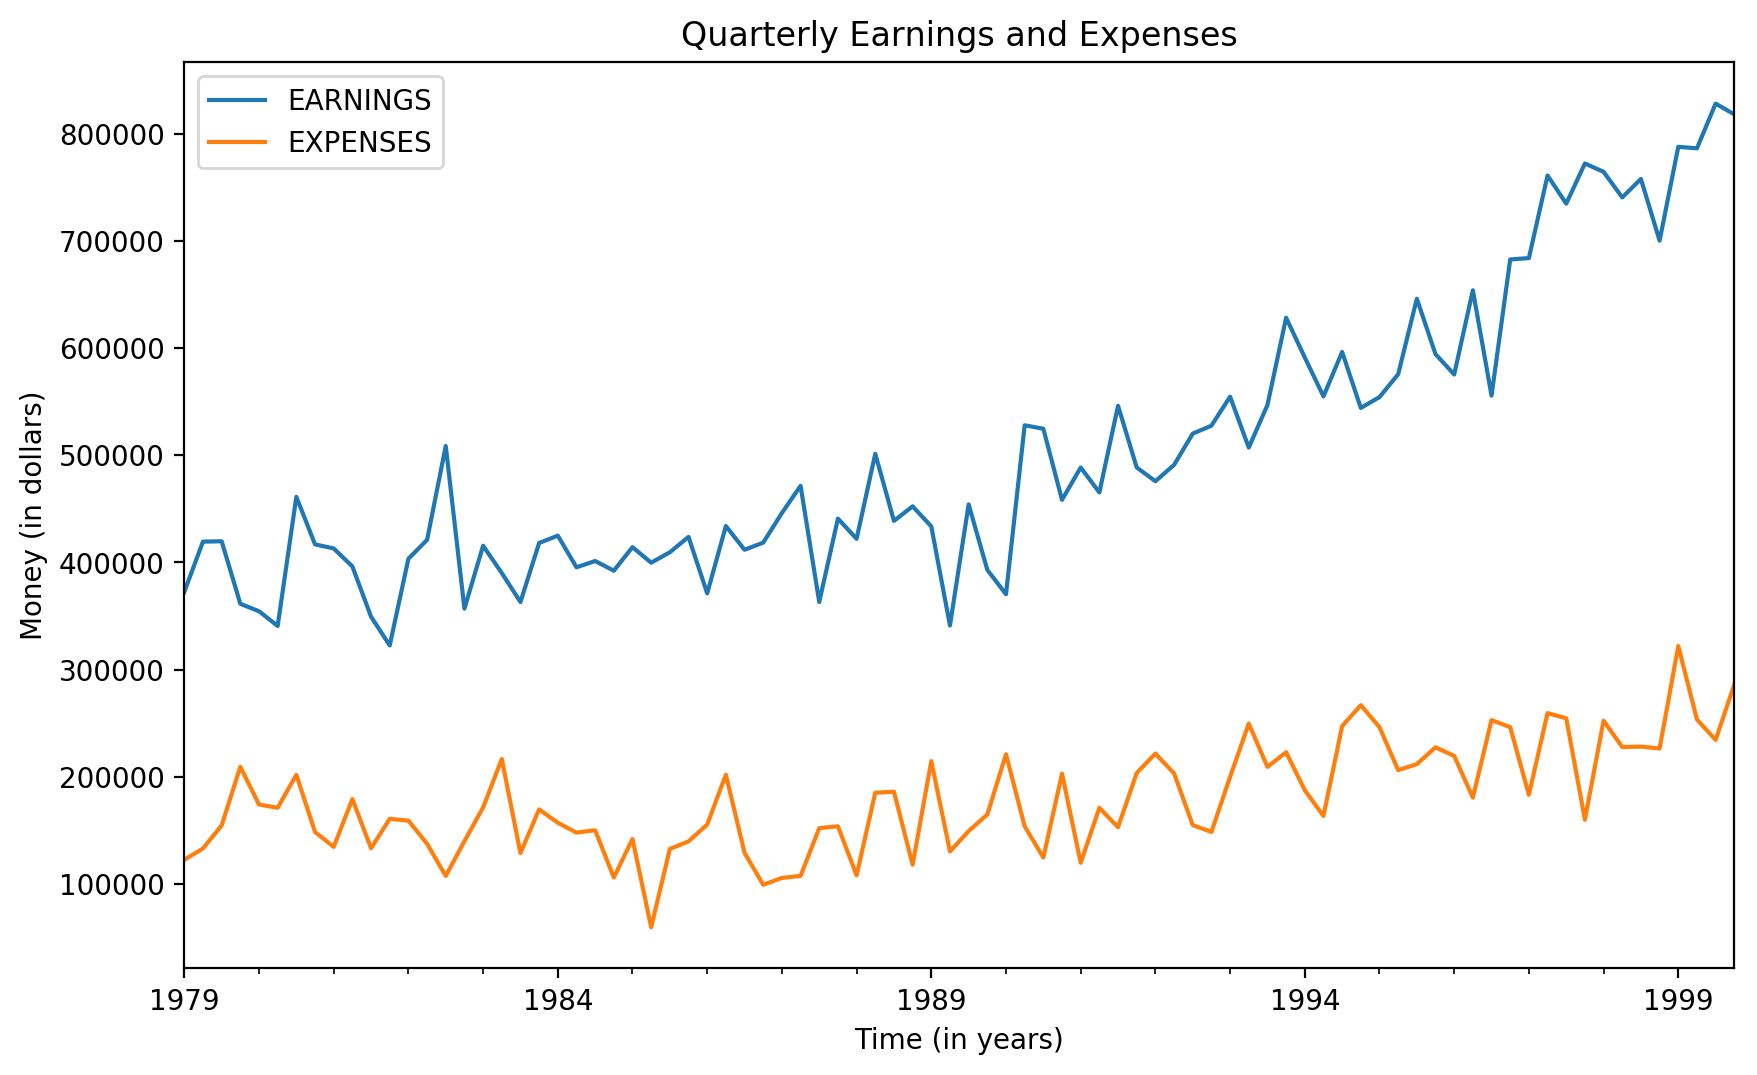

In [18]:
finances.plot()
plt.xlabel("Time (in years)")
plt.ylabel("Money (in dollars)")
plt.title("Quarterly Earnings and Expenses")

The file `website_traffic.csv` contains records for different visits to a fictitious website.
Read in the data, calculated the duration of each visit (in seconds), and converted the index to a `DatetimeIndex`.
Used downsampling to calculate the average visit duration by minute, and the average visit duration by hour.
Plotted both results on the same graph.

In [44]:
traffic = pd.read_csv("website_traffic.csv")
traffic.head()

,IP,ENTER,LEAVE
0,187.162.243.198,2016-10-07 01:01:01,2016-10-07 01:04:57
1,119.200.107.183,2016-10-07 01:01:01,2016-10-07 01:03:47
2,170.158.132.203,2016-10-07 01:01:06,2016-10-07 01:03:09
3,24.169.81.199,2016-10-07 01:01:18,2016-10-07 01:09:36
4,186.129.160.43,2016-10-07 01:01:20,2016-10-07 01:08:32


In [45]:
traffic["LEAVE"] = pd.to_datetime(traffic["LEAVE"])
traffic["ENTER"] = pd.to_datetime(traffic["ENTER"])
traffic.index = traffic["ENTER"]
traffic.head()

,IP,ENTER,LEAVE
ENTER,,,
2016-10-07 01:01:01,187.162.243.198,2016-10-07 01:01:01,2016-10-07 01:04:57
2016-10-07 01:01:01,119.200.107.183,2016-10-07 01:01:01,2016-10-07 01:03:47
2016-10-07 01:01:06,170.158.132.203,2016-10-07 01:01:06,2016-10-07 01:03:09
2016-10-07 01:01:18,24.169.81.199,2016-10-07 01:01:18,2016-10-07 01:09:36
2016-10-07 01:01:20,186.129.160.43,2016-10-07 01:01:20,2016-10-07 01:08:32


In [46]:
times = traffic["LEAVE"] - traffic["ENTER"]

In [47]:
traffic["TIME"] = times
traffic["TIME"] = traffic["TIME"].astype("timedelta64[s]")
traffic = traffic.drop(["ENTER","LEAVE"],1)
traffic.head()

,IP,TIME
ENTER,,
2016-10-07 01:01:01,187.162.243.198,236.0
2016-10-07 01:01:01,119.200.107.183,166.0
2016-10-07 01:01:06,170.158.132.203,123.0
2016-10-07 01:01:18,24.169.81.199,498.0
2016-10-07 01:01:20,186.129.160.43,432.0


In [48]:
hour = traffic.resample("H")
minute = traffic.resample("T")

/Users/baileysmith/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app
/Users/baileysmith/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  app.launch_new_instance()


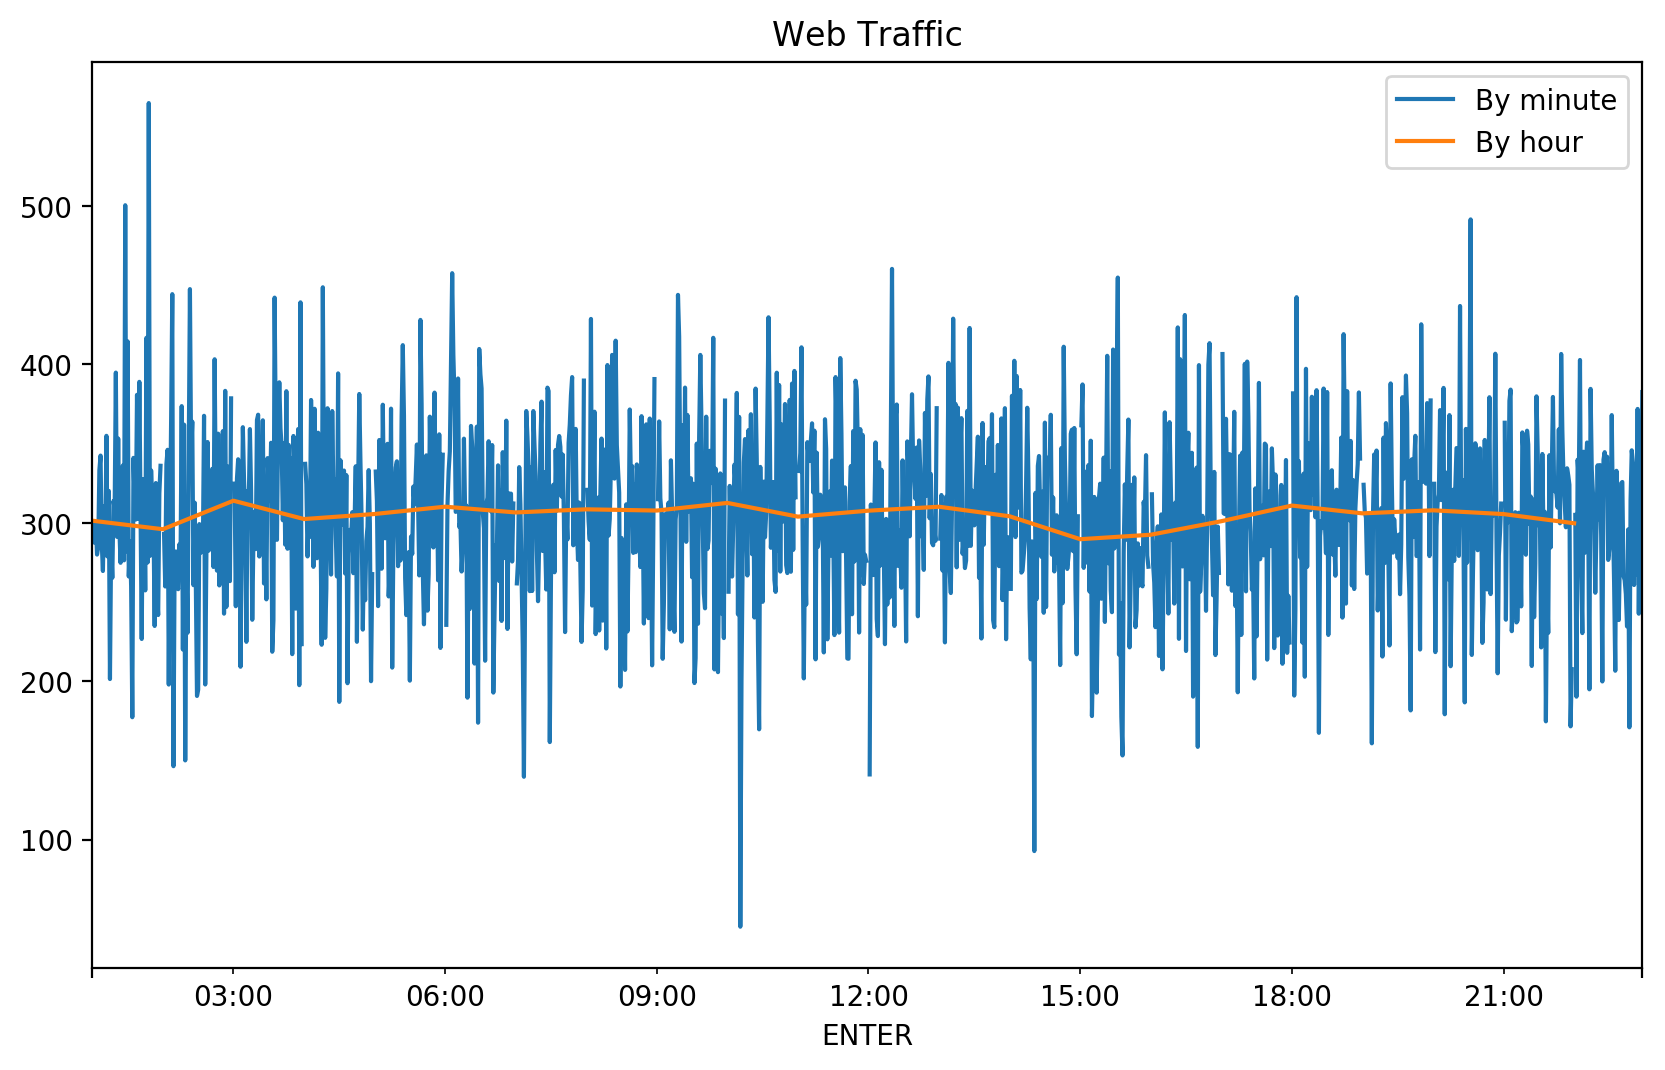

In [49]:
ax = plt.subplot(111)
minute.plot(ax=ax)
hour.plot(ax=ax)
ax.legend(["By minute","By hour"])
ax.set_title("Web Traffic")

Computed the following information about the DJIA dataset.
- The single day with the largest gain.
- The single day with the largest loss.
- The month with the largest gain.
- The month with the largest loss.

For the monthly statistics, defined the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

In [39]:
differences = djia.diff()
maximum = differences.idxmax()
print("Day of the largest gain:", *maximum)

Day of the largest gain: 2008-10-13 00:00:00


In [40]:
minimum = differences.idxmin()
print("Day of the largest loss", *minimum)

Day of the largest loss 2008-09-29 00:00:00


In [63]:
months = djia.resample("M").agg(lambda x: x[-1] - x[0])
maximum = months.idxmax()
print("Month with the largest gain:", *maximum)

Month with the largest gain: 2015-10-31 00:00:00


In [65]:
minimum = months.idxmin()
print("Month with the largest gain:", *minimum)

Month with the largest gain: 2008-10-31 00:00:00


Plotted the following from the DJIA dataset with a window or span of 30, 120, and 365.
- The original data points.
- Rolling average.
- Exponential average.
- Minimum rolling values.
- Maximum rolling values.

In [51]:
def plotDJIA(window):
    ax = plt.subplot(221)
    djia.plot(color="gray",lw=.3,ax=ax)
    djia.rolling(window=window).mean().plot(lw=1, ax=ax)
    ax.legend(["Actual", "Rolling"], loc="best")
    ax.set_title("Rolling Average (window = " + str(window) + ")")
    plt.xlabel("")
    plt.tick_params(labelbottom="off")

    ax2 = plt.subplot(222)
    djia.plot(color="gray",lw=.3, ax=ax2)
    djia.ewm(span=window).mean().plot(color='g', lw=1, ax=ax2)
    ax2.legend(["Actual", "EWMA"], loc="best")
    ax2.set_title("EWMA (span = " + str(window) + ")")
    plt.xlabel("")
    plt.tick_params(labelleft="off")
    plt.tick_params(labelbottom="off")

    ax3 = plt.subplot(223)
    djia.plot(color="gray",lw=.3,ax=ax3)
    djia.rolling(window=window).max().plot(color='c',lw=1, ax=ax3)
    ax3.legend(["Actual", "Rolling"], loc="best")
    ax3.set_title("Rolling Maximum (window = " + str(window) + ")")

    ax4 = plt.subplot(224)
    djia.plot(color="gray",lw=.3,ax=ax4)
    djia.rolling(window=window).min().plot(color='tab:orange',lw=1, ax=ax4)
    ax4.legend(["Actual", "Rolling"], loc="best")
    ax4.set_title("Rolling Minimum (window = " + str(window) + ")")
    plt.tick_params(labelleft="off")
    
    plt.plot()

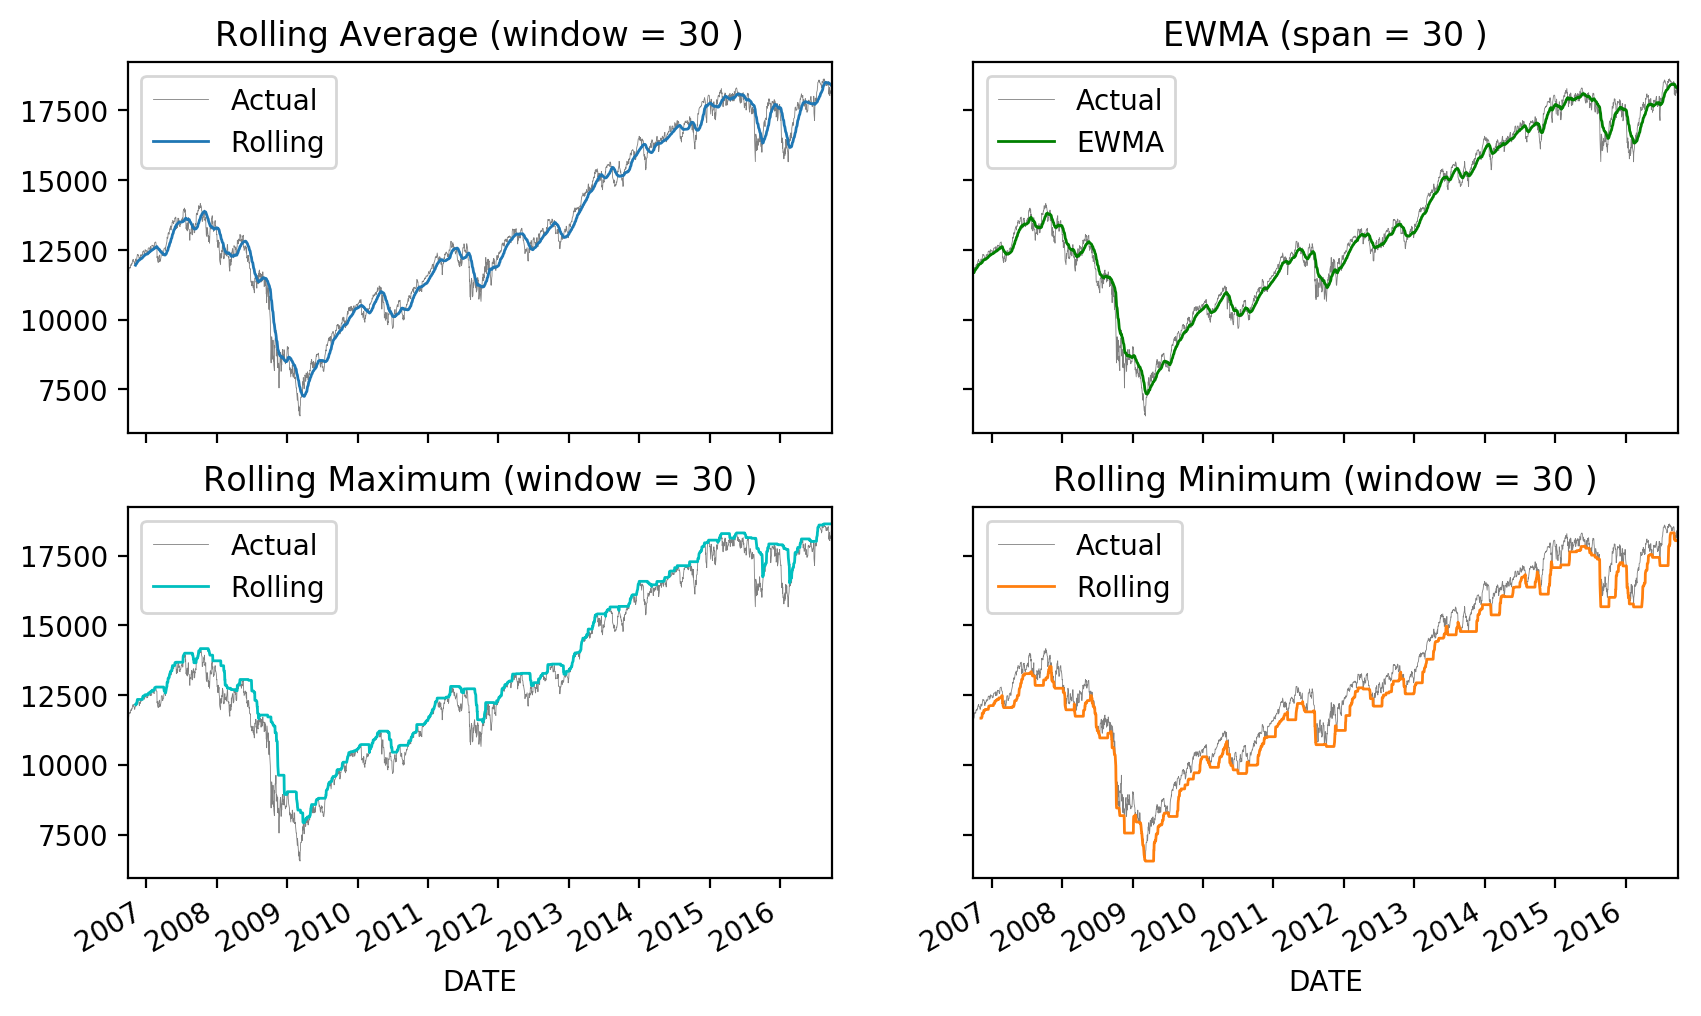

In [52]:
plotDJIA(30)

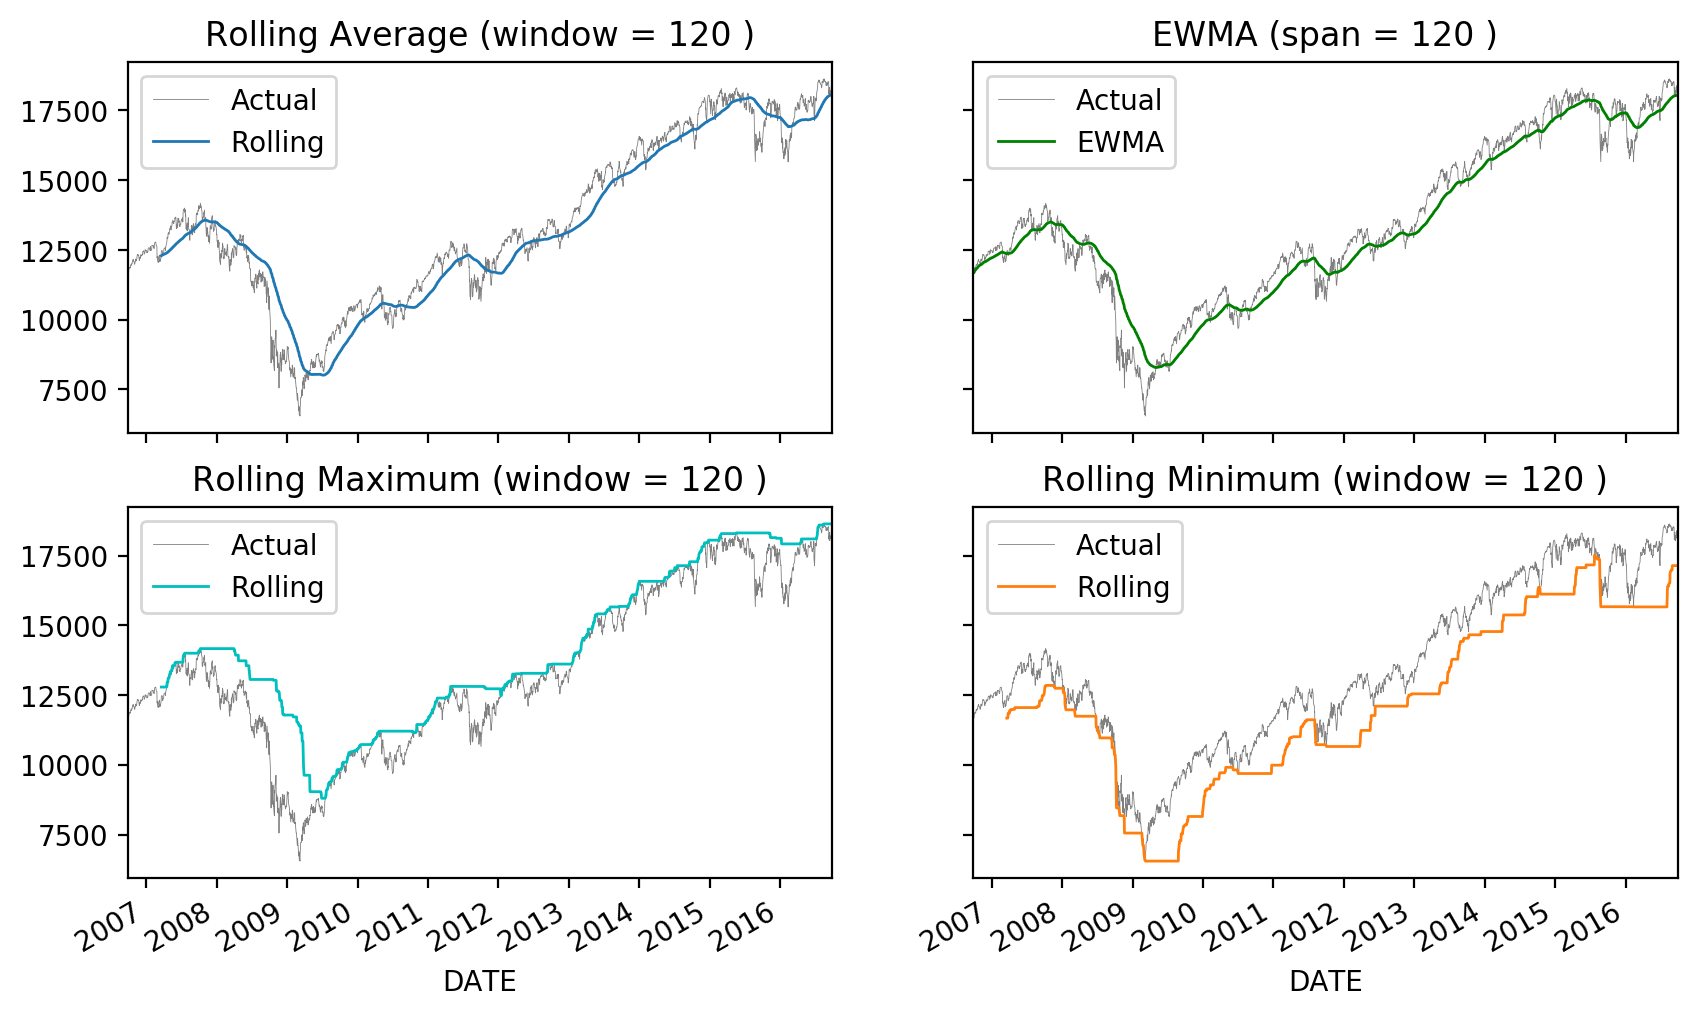

In [53]:
plotDJIA(120)

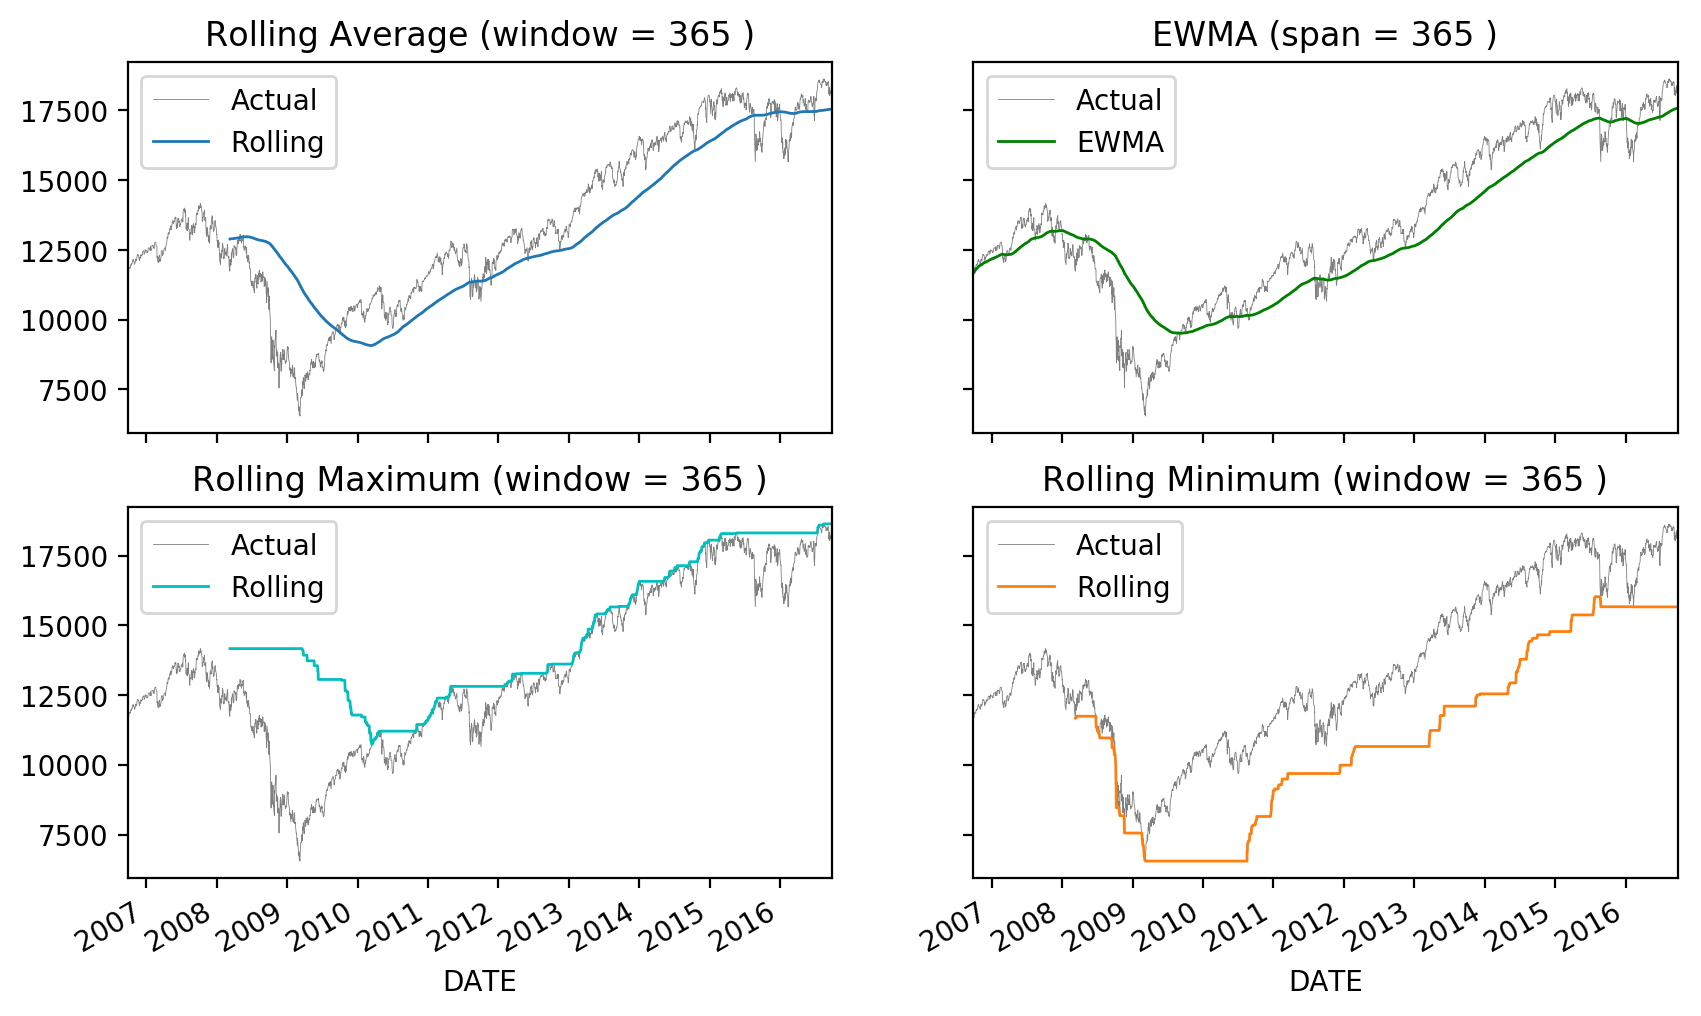

In [54]:
plotDJIA(365)